<a href="https://colab.research.google.com/github/sayam2001/Crypto/blob/main/AccidentDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
batch_size = 64
img_height = 300
img_width = 300

In [5]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ACCIDENTDATA/data/train',
    image_size= (img_height, img_width),
    batch_size=batch_size
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ACCIDENTDATA/data/test',
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
 '/content/drive/MyDrive/ACCIDENTDATA/data/val',
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [6]:
class_names = training_ds.class_names
print(class_names)

['Accident', 'Non Accident']


In [7]:
img_shape = (img_height, img_width, 3)

In [8]:
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(16, 3, activation='relu'),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 10)

Epoch 1/10
13/13 [==============================] - 170s 9s/step - loss: 0.6921 - accuracy: 0.5689 - val_loss: 0.5838 - val_accuracy: 0.6735
Epoch 2/10
13/13 [==============================] - 88s 6s/step - loss: 0.5388 - accuracy: 0.7219 - val_loss: 0.4570 - val_accuracy: 0.7857
Epoch 3/10
13/13 [==============================] - 88s 6s/step - loss: 0.3634 - accuracy: 0.8394 - val_loss: 0.2631 - val_accuracy: 0.8878
Epoch 4/10
13/13 [==============================] - 98s 6s/step - loss: 0.2397 - accuracy: 0.8887 - val_loss: 0.3654 - val_accuracy: 0.8469
Epoch 5/10
13/13 [==============================] - 82s 6s/step - loss: 0.1354 - accuracy: 0.9469 - val_loss: 0.2148 - val_accuracy: 0.9184
Epoch 6/10
13/13 [==============================] - 85s 6s/step - loss: 0.1290 - accuracy: 0.9444 - val_loss: 0.2977 - val_accuracy: 0.9082
Epoch 7/10
13/13 [==============================] - 87s 6s/step - loss: 0.0939 - accuracy: 0.9570 - val_loss: 0.3125 - val_accuracy: 0.8980
Epoch 8/10
13/13 [=

In [11]:
model.save("AccidentDetectionModel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


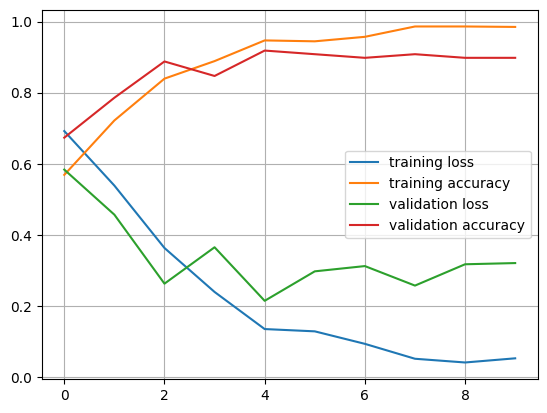

In [12]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

2/2 [==============================] - 6s 2s/step


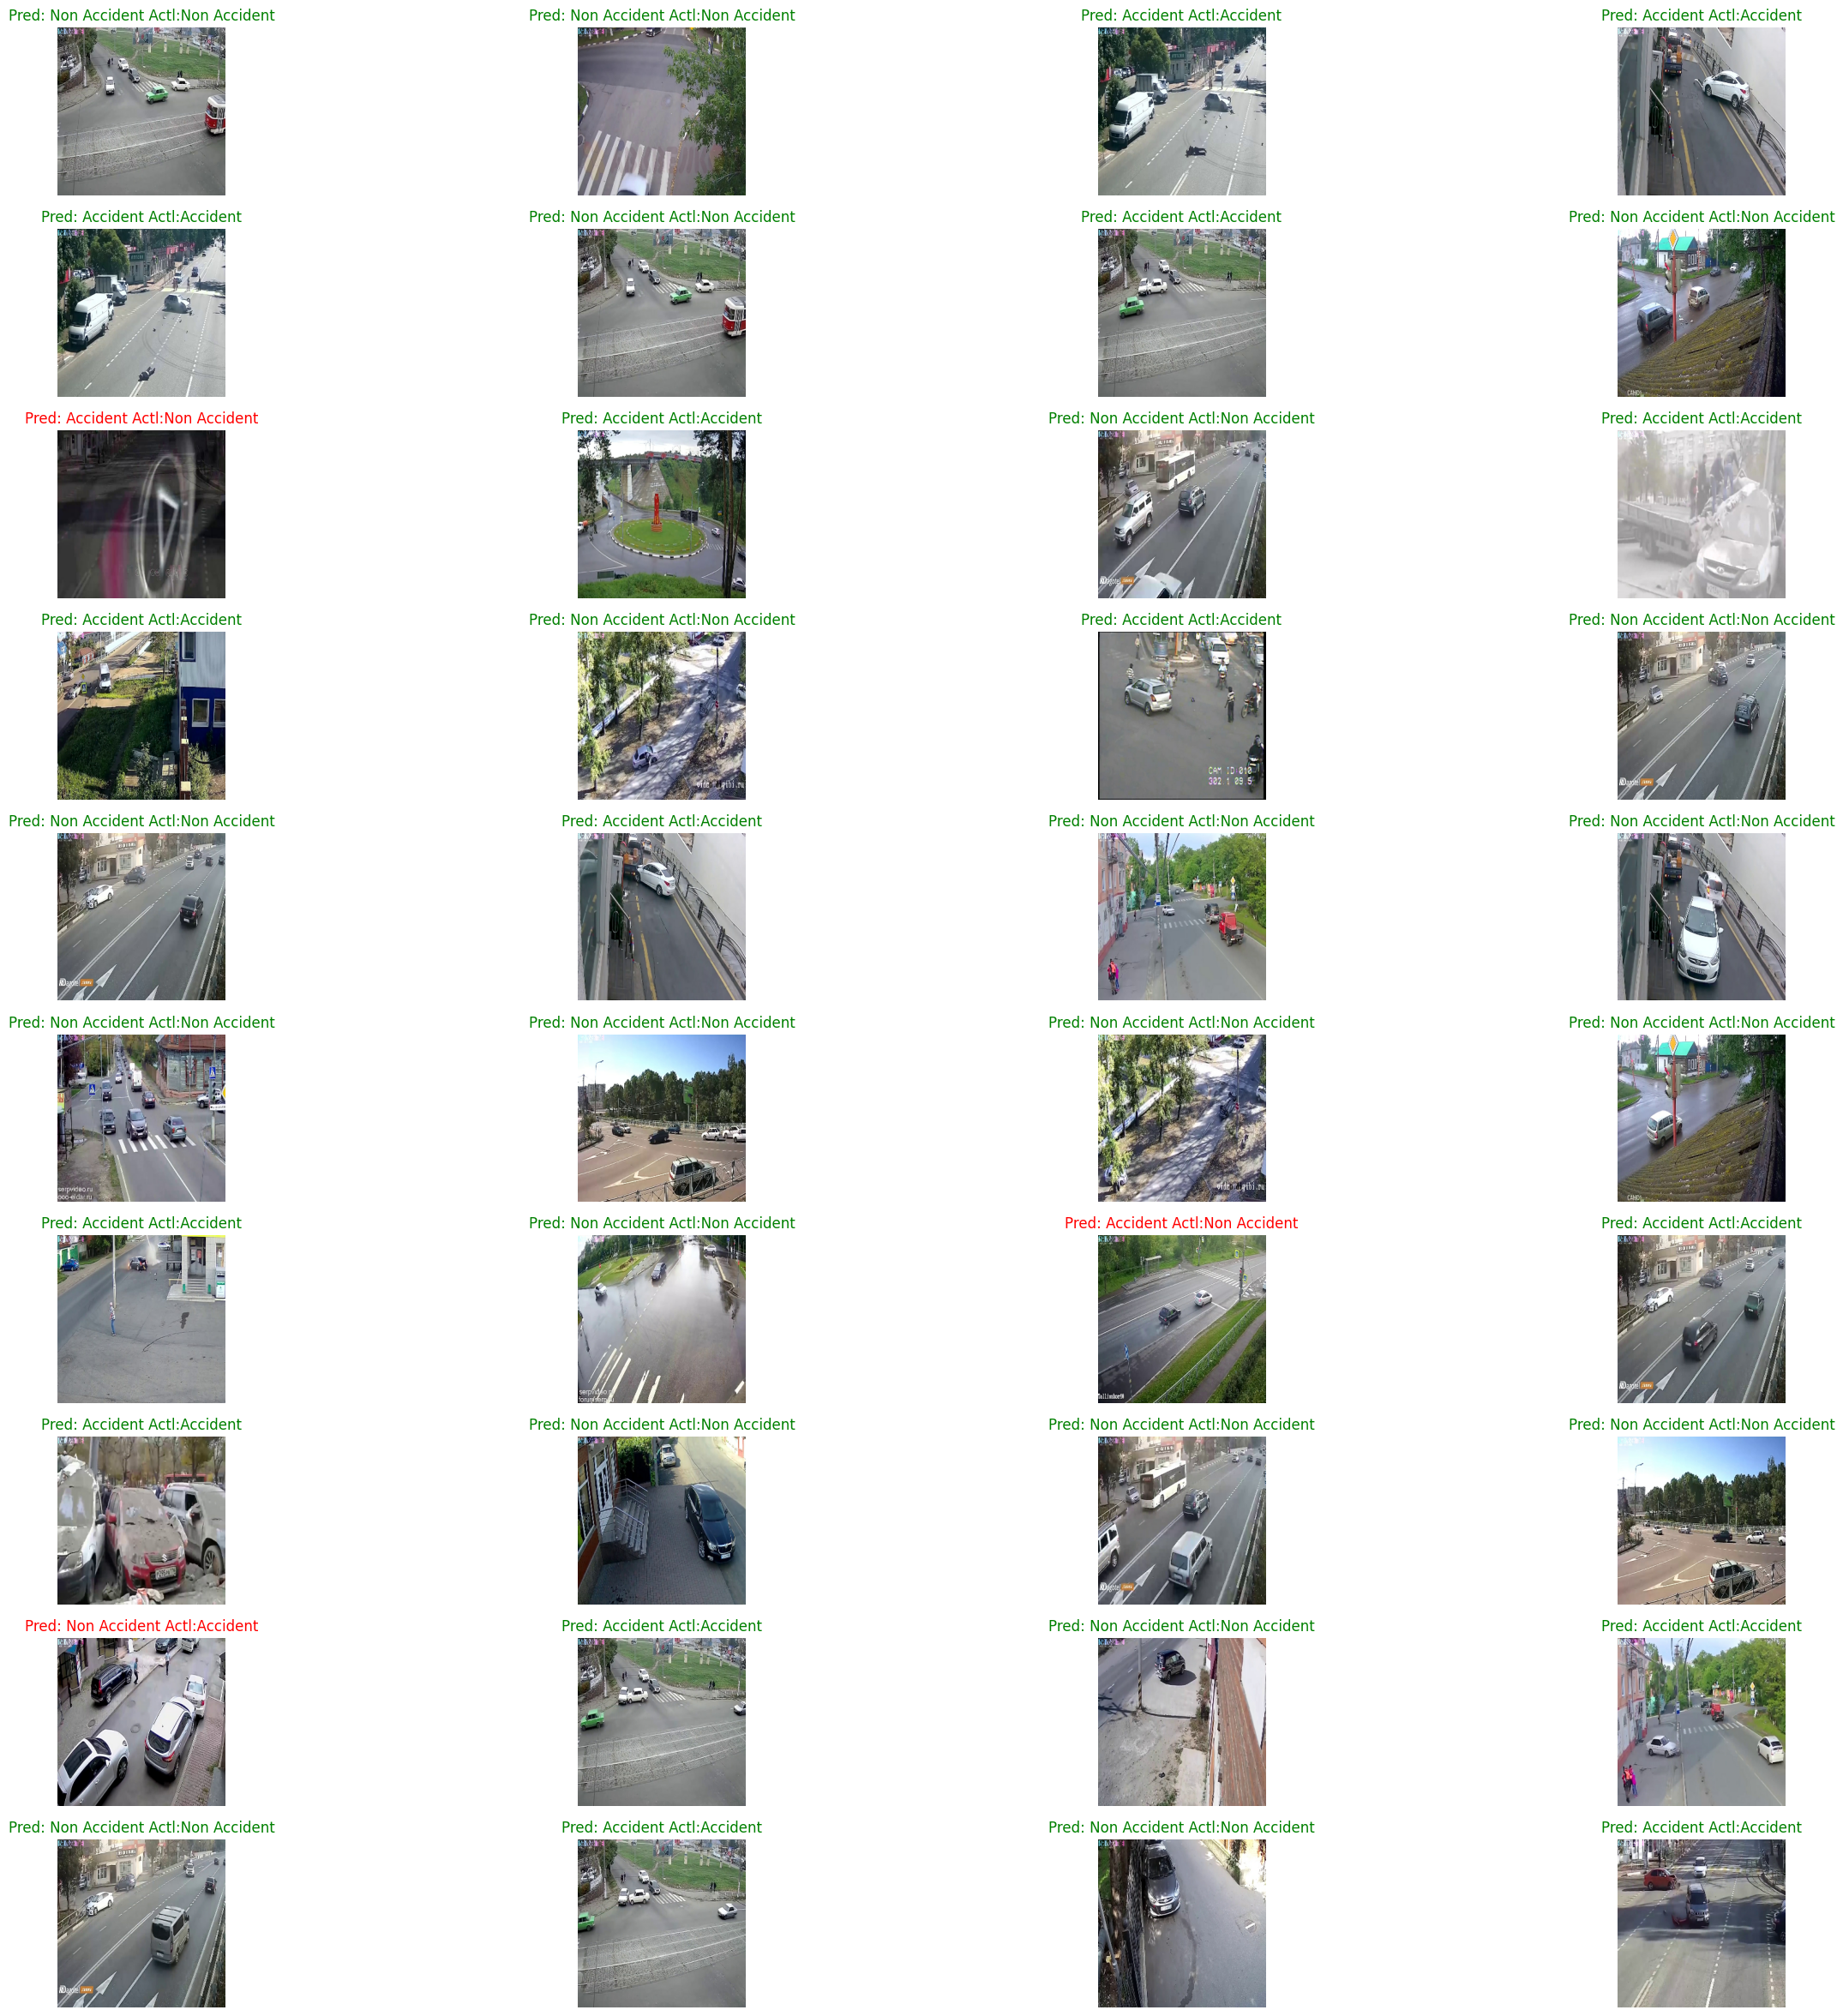

In [13]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if (predlabel[i] == class_names[labels[i]]):
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "green")
        else:
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "red")
        plt.axis('off')
        plt.grid(True)

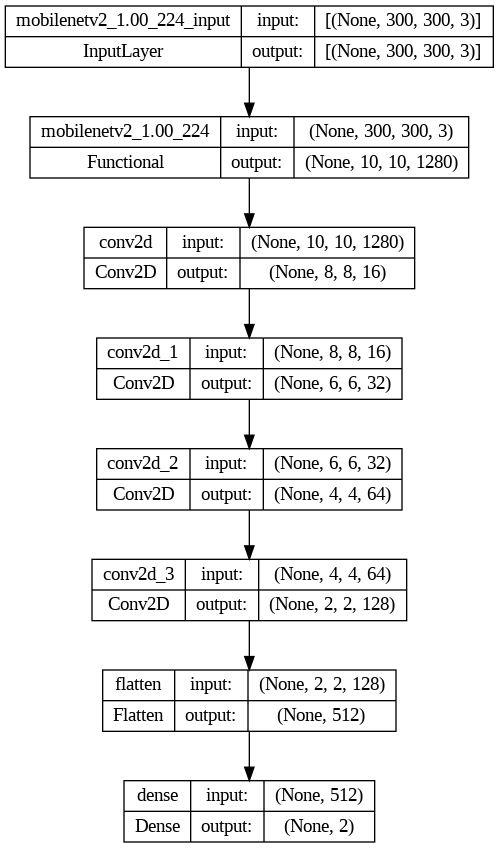

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
 def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) < 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [21]:
saved_model_dir = '/content/AccidentDetectionModel.h5'
directory = os.path.dirname(saved_model_dir)
print("Directory of saved model:", directory)


Directory of saved model: /content


In [19]:
import os